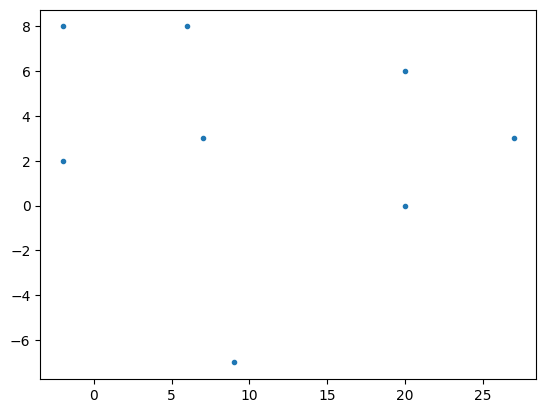

In [1]:
## Generate a point-cloud with 8 points.
import numpy as np
import matplotlib.pyplot as plt

point_cloud = np.array([[-2.0,8.0],
                        [6.0,8.0],
                        [-2.0,2.0],
                        [7.0,3.0],
                        [27.0, 3.0],
                        [20.0,6.0],
                        [20.0,0.0],
                        [9.0,-7.0]
                        ])

plt.plot(point_cloud[:,0], point_cloud[:,1], '.')

In [ ]:
## Visualize Vietoris-Rips Complex

from matplotlib.patches import Circle,Polygon

euler_characteristic = []
euler_characteristic_tuple = []

for i in range(200):
    v = len(point_cloud)
    e = 0
    f = 0

    epsilon = i/10   # distance parameter
    m = len(point_cloud)    # the number of points in given point cloud
    adj_mat = np.zeros((m,m))

    ## Assume that the metric for our point cloud is Euclidean distance.
    def Euclidean_distance(x,y):
        norm = np.dot(x-y,x-y)
        return np.sqrt(norm)
    
    plt.figure(figsize=(20,9))
    plt.subplot(1,2,1)
    ## Step 1. For each point p, draw a circle with radius epsilon and center p
    plt.plot(point_cloud[:,0], point_cloud[:,1], '.')
    for i in range(0,len(point_cloud)):
        plt.gca().add_patch(Circle(point_cloud[i], radius = epsilon, alpha = 0.3))
        plt.annotate(f'{i+1}',(point_cloud[i]))


    ## Step 2. If the distance between two points x and y is less than epsilon, connect two points with edge.
    for x,i in zip(point_cloud,np.arange(m)):
        for y,j in zip(point_cloud,np.arange(m)):
            if 0 < Euclidean_distance(x,y) < epsilon:
                plt.plot([x[0],y[0]],[x[1],y[1]],'-')
                adj_mat[i,j] = 1
                adj_mat[j,i] = 1
                e += 1


    ## Step 3. If three edges consist of a triangle, fill in the face of the triangle.
    for i in range(0,m):
        for j in range(0,m):
            for k in range(0,m):
                if (adj_mat[i,j] == 1) & (adj_mat[j,k] == 1) & (adj_mat[k,i] == 1):
                    plt.gca().add_patch(Polygon((point_cloud[i],point_cloud[j],point_cloud[k]), facecolor = 'm'))
                    f += 1

    plt.title(f'Vietoris-Rips complex of point cloud for $\epsilon$ = {epsilon}, v={v}, e={e//2}, f={f//6}, EC={v-(e//2)+(f//6)}', fontsize = 14)
    euler_characteristic.append(v-(e//2)+(f//6))
    euler_characteristic_tuple.append((v, v-(e//2), v-(e//2)+(f//6)))
    plt.xlim(np.min(point_cloud)-epsilon,np.max(point_cloud)+epsilon)
    plt.ylim(np.min(point_cloud)-epsilon,np.max(point_cloud)+epsilon)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.title('Euler Characteristic')
    plt.scatter(range(len(euler_characteristic)), euler_characteristic)
    plt.xlim([0, 210])
    plt.ylim([-0.5,9.5])
    plt.savefig('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/total_fig/epsilon={}.png'.format(str(epsilon*10)))

In [4]:
def img2mp4(paths, pathOut , fps =10 ) :
    import cv2
    frame_array = []
    for idx , path in enumerate(paths) :
        img = cv2.imread(path)
        height, width, layers = img.shape
        size = (width,height)
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()


import os
import re
paths = sorted(os.listdir('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/total_fig'), key=lambda s: int(re.search(r'\d+', s).group()))
paths = [os.path.join('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/total_fig',path) for path in paths]
img2mp4(paths ,'/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/final.mp4', fps=6)

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Text(0.5, 1.0, 'Euler Characteristic')

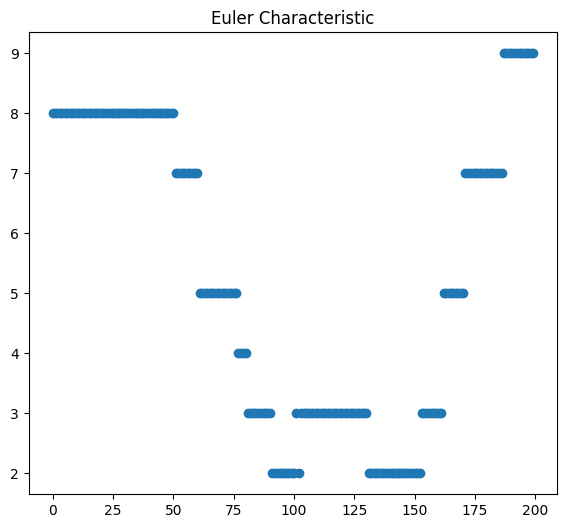

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(range(len(euler_characteristic)), euler_characteristic)
plt.title('Euler Characteristic')

In [6]:
import os
from PIL import Image
from IPython.display import Image as Img
from IPython.display import display
import re


In [7]:
def generate_gif(path):
    img_list = os.listdir(path)
    img_list = sorted(img_list, key=lambda s: int(re.search(r'\d+', s).group()))
    print(img_list)
    img_list = [path + '/' + x for x in img_list]
    images = [Image.open(x) for x in img_list]
    
    im = images[0]
    im.save('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/VR_figout.gif', save_all=True, append_images=images[1:],loop=0xff, duration=100)
    # loop 반복 횟수
    # duration 프레임 전환 속도 (500 = 0.5초)
    return Img(url='out.gif')
gif = generate_gif('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/VR_fig')

['epsilon=0.0.png', 'epsilon=1.0.png', 'epsilon=2.0.png', 'epsilon=3.0.png', 'epsilon=4.0.png', 'epsilon=5.0.png', 'epsilon=6.0.png', 'epsilon=7.0.png', 'epsilon=8.0.png', 'epsilon=9.0.png', 'epsilon=10.0.png', 'epsilon=11.0.png', 'epsilon=12.0.png', 'epsilon=13.0.png', 'epsilon=14.0.png', 'epsilon=15.0.png', 'epsilon=16.0.png', 'epsilon=17.0.png', 'epsilon=18.0.png', 'epsilon=19.0.png', 'epsilon=20.0.png', 'epsilon=21.0.png', 'epsilon=22.0.png', 'epsilon=23.0.png', 'epsilon=24.0.png', 'epsilon=25.0.png', 'epsilon=26.0.png', 'epsilon=27.0.png', 'epsilon=28.0.png', 'epsilon=29.0.png', 'epsilon=30.0.png', 'epsilon=31.0.png', 'epsilon=32.0.png', 'epsilon=33.0.png', 'epsilon=34.0.png', 'epsilon=35.0.png', 'epsilon=36.0.png', 'epsilon=37.0.png', 'epsilon=38.0.png', 'epsilon=39.0.png', 'epsilon=40.0.png', 'epsilon=41.0.png', 'epsilon=42.0.png', 'epsilon=43.0.png', 'epsilon=44.0.png', 'epsilon=45.0.png', 'epsilon=46.0.png', 'epsilon=47.0.png', 'epsilon=48.0.png', 'epsilon=49.0.png', 'epsilon=

In [8]:
def img2mp4(paths, pathOut , fps =10 ) :
    import cv2
    frame_array = []
    for idx , path in enumerate(paths) :
        img = cv2.imread(path)
        height, width, layers = img.shape
        size = (width,height)
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()


import os
paths = sorted(os.listdir('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/VR_fig'), key=lambda s: int(re.search(r'\d+', s).group()))
paths = [os.path.join('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/VR_fig',path) for path in paths]
img2mp4(paths ,'/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/out.mp4', fps=6)

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [9]:
print(euler_characteristic_tuple)

[(8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 8, 8), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 7, 7), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 5, 5), (8, 3, 4), (8, 3, 4), (8, 3, 4), (8, 3, 4), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3), (8, 2, 3)

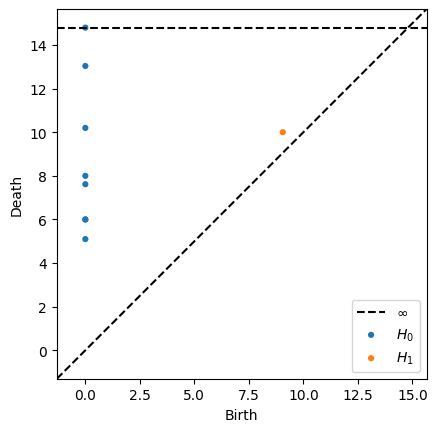

In [10]:
from ripser import ripser
from persim import plot_diagrams
diagrams = ripser(point_cloud)['dgms']
plot_diagrams(diagrams, show=True)

In [11]:
from data.generate_datasets import make_point_clouds

point_clouds_basic, labels_basic = make_point_clouds(n_samples_per_shape=10, n_points=5, noise=0.5)
point_clouds_basic.shape, labels_basic.shape

((30, 25, 3), (30,))

In [12]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(point_clouds_basic[0])

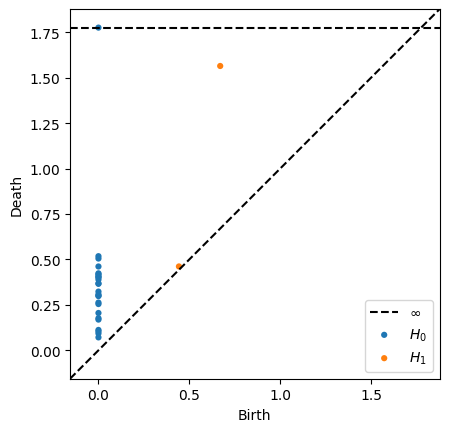

In [13]:
from ripser import ripser
from persim import plot_diagrams
diagrams = ripser(point_clouds_basic[0])['dgms']
plot_diagrams(diagrams, show=True)

In [14]:
point_cloud = point_clouds_basic[0][:,:2]

In [ ]:
## Visualize Vietoris-Rips Complex

from matplotlib.patches import Circle,Polygon
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

euler_characteristic = []
euler_characteristic_tuple = []

for _ in tqdm(range(100)):
    v = len(point_cloud)
    e = 0
    f = 0

    epsilon = _/100   # distance parameter
    m = len(point_cloud)    # the number of points in given point cloud
    adj_mat = np.zeros((m,m))

    ## Assume that the metric for our point cloud is Euclidean distance.
    def Euclidean_distance(x,y):
        norm = np.dot(x-y,x-y)
        return np.sqrt(norm)
    
    plt.figure(figsize=(20,9))
    plt.subplot(1,2,1)
    ## Step 1. For each point p, draw a circle with radius epsilon and center p
    plt.plot(point_cloud[:,0], point_cloud[:,1], '.')
    for i in range(0,len(point_cloud)):
        plt.gca().add_patch(Circle(point_cloud[i], radius = epsilon, alpha = 0.3))
        plt.annotate(f'{i+1}',(point_cloud[i]))


    ## Step 2. If the distance between two points x and y is less than epsilon, connect two points with edge.
    for x,i in zip(point_cloud,np.arange(m)):
        for y,j in zip(point_cloud,np.arange(m)):
            if 0 < Euclidean_distance(x,y) < epsilon:
                plt.plot([x[0],y[0]],[x[1],y[1]],'-')
                adj_mat[i,j] = 1
                adj_mat[j,i] = 1
                e += 1


    ## Step 3. If three edges consist of a triangle, fill in the face of the triangle.
    for i in range(0,m):
        for j in range(0,m):
            for k in range(0,m):
                if (adj_mat[i,j] == 1) & (adj_mat[j,k] == 1) & (adj_mat[k,i] == 1):
                    plt.gca().add_patch(Polygon((point_cloud[i],point_cloud[j],point_cloud[k]), facecolor = 'm'))
                    f += 1

    plt.title(f'Vietoris-Rips complex of point cloud for $\epsilon$ = {epsilon}, v={v}, e={e//2}, f={f//6}, EC={v-(e//2)+(f//6)}', fontsize = 14)
    euler_characteristic.append(v-(e//2)+(f//6))
    euler_characteristic_tuple.append((v, v-(e//2), v-(e//2)+(f//6)))
    plt.xlim(np.min(point_cloud)-epsilon,np.max(point_cloud)+epsilon)
    plt.ylim(np.min(point_cloud)-epsilon,np.max(point_cloud)+epsilon)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.title('Euler Characteristic')
    plt.scatter(range(len(euler_characteristic)), euler_characteristic)
    plt.savefig('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/hole_fig/epsilon={}.png'.format(_))
    plt.show()

In [16]:
def img2mp4(paths, pathOut , fps =10 ) :
    import cv2
    frame_array = []
    for idx , path in enumerate(paths) :
        img = cv2.imread(path)
        height, width, layers = img.shape
        size = (width,height)
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()


import os
import re
paths = sorted(os.listdir('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/hole_fig'), key=lambda s: int(re.search(r'\d+', s).group()))
paths = [os.path.join('/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/hole_fig',path) for path in paths]
img2mp4(paths ,'/Users/tuna200538/Desktop/청운고/3학년/동아리/TDA/test/hole.mp4', fps=6)

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


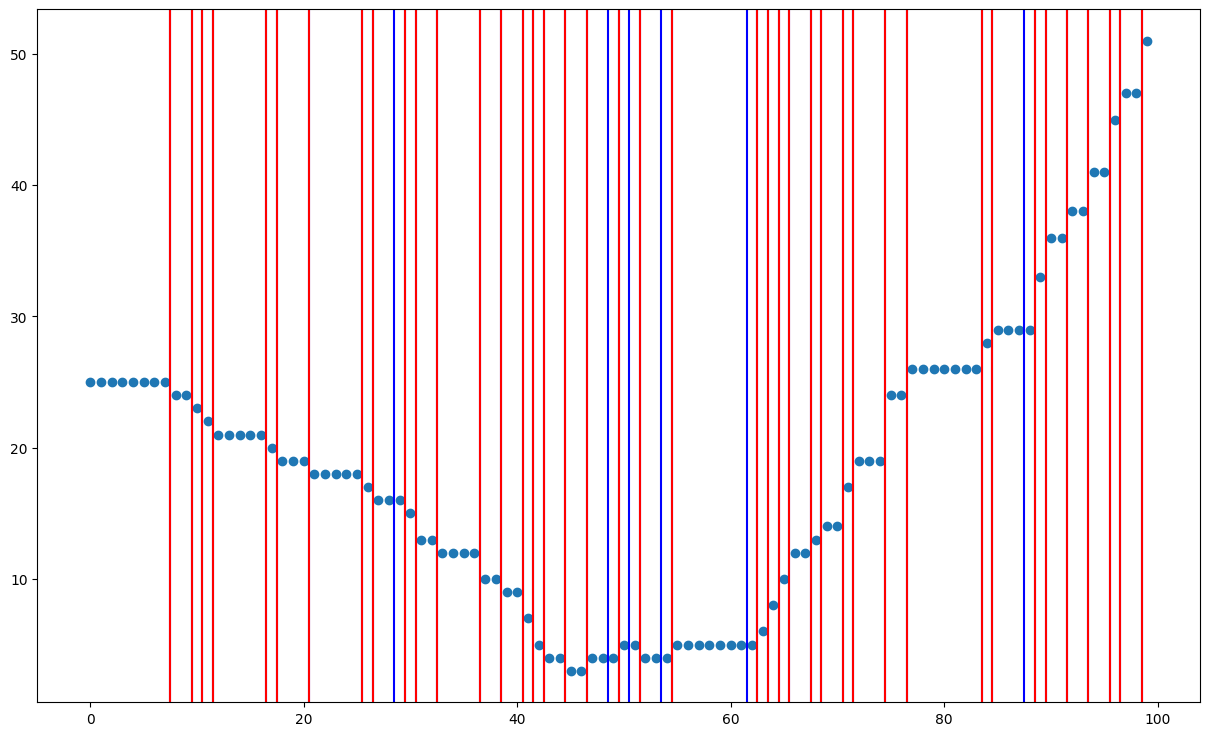

In [28]:
plt.figure(figsize=[15, 9])
for i in range(len(euler_characteristic)-1):
    if euler_characteristic_tuple[i][1] != euler_characteristic_tuple[i+1][1]:
        plt.axvline(x=(2*i+1)/2, color='b')
for i in range(len(euler_characteristic)-1):
    if euler_characteristic[i] != euler_characteristic[i+1]:
        plt.axvline(x=(2*i+1)/2, color='r')
plt.scatter(range(len(euler_characteristic)), euler_characteristic)
plt.show()